In [269]:
import os
import sys
sys.path.insert(0, os.path.abspath('../utils'))
import Helpers as hp
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector # to compute state vectors
from qiskit.visualization import array_to_latex
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator # ideal simulator backend
from qiskit.visualization import plot_histogram  # to plot histograms of simulation results
import numpy as np
from IPython.display import display, Markdown, Latex
import sympy as sp

# Exercise 1

![Ex1a](res/ex1_a.png)

In [270]:
def make_qc1():
    qc = QuantumCircuit(1, 1)
    qc.rx(2*np.arccos(0.8),0)
    qc.rz(5*np.pi/6,0)
    return qc

def simulate_measure(qc, n_measure, labels=['0'], show = False):
    idealSim=AerSimulator()
    result=idealSim.run(qc, shots=n_measure).result()

    try:
        show and display(plot_histogram(result.get_counts()))
        res = 0
        for label in labels:
            res += result.get_counts()[label]
        return res
    except:
        return 0

### Layout

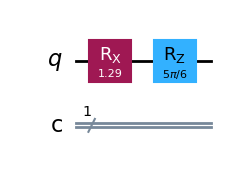

### Unitary Matrix

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector with global phase

<IPython.core.display.Latex object>

### Output Statevector without global phase

<IPython.core.display.Latex object>

In [271]:
qc = make_qc1()
hp.display_structure(qc)
stateVecIn = Statevector.from_label('0')
hp.display_state_vector("Input Statevector", stateVecIn, "|0 \\rangle")
stateVecOut = stateVecIn.evolve(qc)
hp.display_state_vector("Output Statevector with global phase", stateVecOut, "[0.8 e^{-\\displaystyle\\frac{5\\Pi}{12}}, 0.6 e^{-\\displaystyle\\frac{\\Pi}{12}}]")

global_phase = np.angle(stateVecOut.data[0])
stateVecOut_no_global_phase = stateVecOut / np.exp(1j * global_phase)  # === stateVecOut * np.exp(-1j * global_phase)
hp.display_state_vector("Output Statevector without global phase", stateVecOut_no_global_phase, "[0.8, 0.6 e^{\\displaystyle\\frac{\\Pi}{3}} ]")

![Ex1b](res/ex1_b.png)

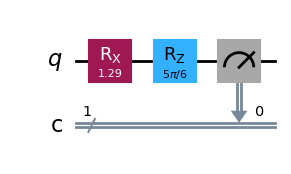

### Expected Alpha: 0.8

### 10 measurements: 7 alpha: 0.8944271909999159

### 100 measurements: 64 alpha: 0.7483314773547883

### 1000 measurements: 642 alpha: 0.806225774829855

In [272]:
qc_z = make_qc1()
qc_z.measure(0,0)
display(qc_z.draw(output='mpl'))
display(Markdown("### Expected Alpha: " +str(0.8)))
display(Markdown("### 10 measurements: " +str(simulate_measure(qc_z, 10)) + " alpha: " +str(np.sqrt(simulate_measure(qc_z, 10)/10))))
display(Markdown("### 100 measurements: " +str(simulate_measure(qc_z, 100)) + " alpha: " +str(np.sqrt(simulate_measure(qc_z, 100)/100))))
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_z, 1000)) + " alpha: " +str(np.sqrt(simulate_measure(qc_z, 1000)/1000))))


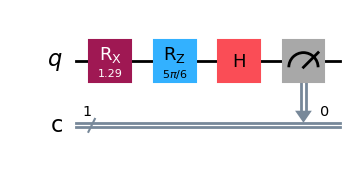

### Expected BetaRe: 0.30000000000000004

### 10 measurements: 9 betaRe: 0.37500000000000006 betaRe with z extimate: 0.42426406871192857

### 100 measurements: 75 betaRe: 0.325 betaRe with z extimate: 0.32756920994133026

### 1000 measurements: 745 betaRe: 0.3 betaRe with z extimate: 0.29814239699997197

In [273]:
qc_x = make_qc1()
qc_x.h(0)
qc_x.measure(0,0)
display(qc_x.draw(output='mpl'))
display(Markdown("### Expected BetaRe: " +str(0.6*np.cos(np.pi/3))))
p0 = simulate_measure(qc_x, 10)/10
t = p0 - (1 - p0)
display(Markdown("### 10 measurements: " +str(simulate_measure(qc_x, 10)) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 10)/10)))))
p0 = simulate_measure(qc_x, 100)/100
t = p0 - (1 - p0)
display(Markdown("### 100 measurements: " +str(simulate_measure(qc_x, 100)) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 100)/100)))))
p0 = simulate_measure(qc_x, 1000)/1000
t = p0 - (1 - p0)
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_x, 1000)) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000)/1000)))))

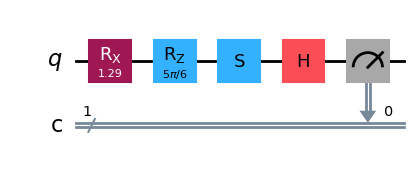

### Expected BetaIm: 0.5196152422706631

### 10 measurements: 1 betaIm: 0.5 betaIm with z extimate: 0.447213595499958

### 100 measurements: 7 betaIm: 0.5499999999999999 betaIm with z extimate: 0.5543478937468665

### 1000 measurements: 93 betaIm: 0.54625 betaIm with z extimate: 0.5424492193966519

In [274]:
qc_y = make_qc1()
qc_y.s(0)
qc_y.h(0)
qc_y.measure(0,0)
display(qc_y.draw(output='mpl'))
display(Markdown("### Expected BetaIm: " +str(0.6*np.sin(np.pi/3))))
p0 = simulate_measure(qc_y, 10)/10
t = (1 - p0) - p0
display(Markdown("### 10 measurements: " +str(simulate_measure(qc_y, 10)) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 10)/10)))))
p0 = simulate_measure(qc_y, 100)/100
t = (1 - p0) - p0
display(Markdown("### 100 measurements: " +str(simulate_measure(qc_y, 100)) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 100)/100)))))
p0 = simulate_measure(qc_y, 1000)/1000
t = (1 - p0) - p0
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_y, 1000)) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000)/1000))))) 

In [275]:
# qc = QuantumCircuit(3, 3)
# qc.rx(2*np.arccos(0.8),0)
# qc.rz(5*np.pi/6,0)
# qc.cx(0,1)
# qc.cx(0,2)
# qc.h(1)
# qc.s(2)
# qc.h(2)
# qc.measure([0, 1, 2], [0, 1, 2])
# display(qc.draw(output='mpl'))
# mes = simulate_measure(qc, 1000)
# display(Markdown("### 10 measurements: " +str(simulate_measure(qc, 10))+ " 1000 measurements: " +str(2*np.arccos(np.sqrt(mes/1000)))))
# display(Markdown("### 100 measurements: " +str(simulate_measure(qc, 100))))
# display(Markdown("### 1000 measurements: " +str(simulate_measure(qc, 1000))))




# Exercise 2
![Ex2a](res/ex2_a.png)

In [276]:
def extract_measure(qc, n_measure, show = False):
    return simulate_measure(qc, n_measure, "000", show) + simulate_measure(qc, n_measure, "001") + simulate_measure(qc, n_measure, "010") + simulate_measure(qc, n_measure, "011")

C:\Users\admin\AppData\Local\Temp\ipykernel_29188\1821072429.py:16: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc_z.x(2).c_if(1, 1)
C:\Users\admin\AppData\Local\Temp\ipykernel_29188\1821072429.py:17: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc_z.z(2).c_if(0, 1)


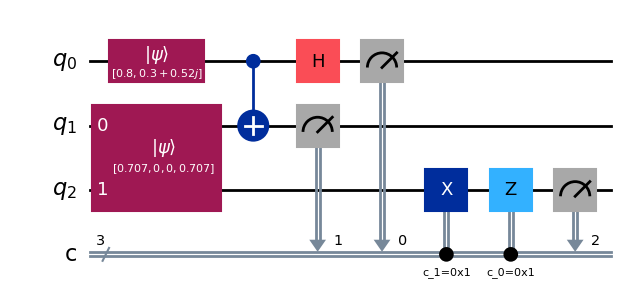

### Expected Alpha: 0.8

### 1000 measurements: 625 alpha: 0.79435508432942

In [277]:
qc_z = QuantumCircuit(3,3)

amplitude_0 = 0.8
amplitude_1 = 0.6
phase = np.pi/3
qc_z.initialize([amplitude_0, amplitude_1 * np.exp(1j * phase)], 0)

state_00 = Statevector.from_label("00")
state_11 = Statevector.from_label("11")
bell_state = (state_00 + state_11) / np.sqrt(2)
qc_z.initialize(bell_state, [1, 2])

qc_z.cx(0,1)
qc_z.h(0)
qc_z.measure([0, 1], [0, 1])
qc_z.x(2).c_if(1, 1)
qc_z.z(2).c_if(0, 1)
qc_z.measure(2, 2)
display(qc_z.draw(output='mpl'))
display(Markdown("### Expected Alpha: " +str(0.8)))
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_z, 1000, ["000", "001", "010", "011"])) + " alpha: " +str(np.sqrt(simulate_measure(qc_z, 1000, ["000", "001", "010", "011"])/1000))))

    

C:\Users\admin\AppData\Local\Temp\ipykernel_29188\1754940886.py:16: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc_x.x(2).c_if(1, 1)
C:\Users\admin\AppData\Local\Temp\ipykernel_29188\1754940886.py:17: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc_x.z(2).c_if(0, 1)


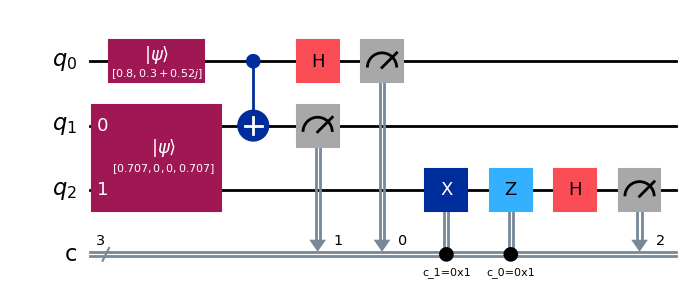

### Expected BetaRe: 0.30000000000000004

### 1000 measurements: 738 betaRe: 0.32125 betaRe with z extimate: 0.3248223894138715

In [278]:
qc_x = QuantumCircuit(3,3)

amplitude_0 = 0.8
amplitude_1 = 0.6
phase = np.pi/3
qc_x.initialize([amplitude_0, amplitude_1 * np.exp(1j * phase)], 0)

state_00 = Statevector.from_label("00")
state_11 = Statevector.from_label("11")
bell_state = (state_00 + state_11) / np.sqrt(2)
qc_x.initialize(bell_state, [1, 2])

qc_x.cx(0,1)
qc_x.h(0)
qc_x.measure([0, 1], [0, 1])
qc_x.x(2).c_if(1, 1)
qc_x.z(2).c_if(0, 1)
qc_x.h(2)
qc_x.measure(2, 2)
display(qc_x.draw(output='mpl'))
display(Markdown("### Expected BetaRe: " +str(0.6*np.cos(np.pi/3))))
p0 = simulate_measure(qc_x, 1000, ["000", "001", "010", "011"])/1000
t = p0 - (1 - p0)
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_x, 1000, ["000", "001", "010", "011"])) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000, ["000", "001", "010", "011"])/1000)))))


C:\Users\admin\AppData\Local\Temp\ipykernel_29188\1177878516.py:16: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc_y.x(2).c_if(1, 1)
C:\Users\admin\AppData\Local\Temp\ipykernel_29188\1177878516.py:17: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc_y.z(2).c_if(0, 1)


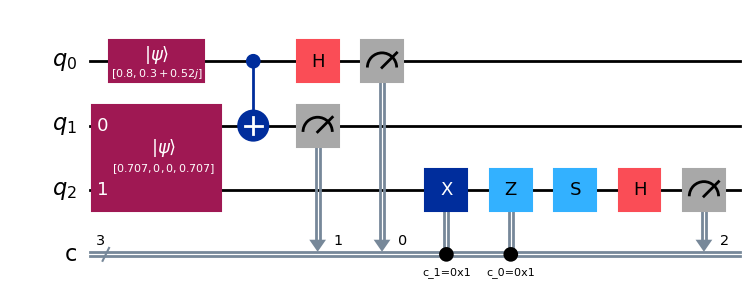

### Expected BetaIm: 0.5196152422706631

### 1000 measurements: 72 betaIm: 0.52875 betaIm with z extimate: 0.5407103171373961

In [279]:
qc_y = QuantumCircuit(3,3)

amplitude_0 = 0.8
amplitude_1 = 0.6
phase = np.pi/3
qc_y.initialize([amplitude_0, amplitude_1 * np.exp(1j * phase)], 0)

state_00 = Statevector.from_label("00")
state_11 = Statevector.from_label("11")
bell_state = (state_00 + state_11) / np.sqrt(2)
qc_y.initialize(bell_state, [1, 2])

qc_y.cx(0,1)
qc_y.h(0)
qc_y.measure([0, 1], [0, 1])
qc_y.x(2).c_if(1, 1)
qc_y.z(2).c_if(0, 1)
qc_y.s(2)
qc_y.h(2)
qc_y.measure(2, 2)
display(qc_y.draw(output='mpl'))
display(Markdown("### Expected BetaIm: " +str(0.6*np.sin(np.pi/3))))
p0 = simulate_measure(qc_y, 1000, ["000", "001", "010", "011"])/1000
t = (1 - p0) - p0
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_y, 1000, ["000", "001", "010", "011"])) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000, ["000", "001", "010", "011"])/1000))))) 